<a href="https://colab.research.google.com/github/ella4-boop/innovation/blob/main/emergingeconomiesinvestment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pylab
import matplotlib.pyplot as p

data1 = "https://raw.githubusercontent.com/ella4-boop/innovation/refs/heads/main/beeps.csv"


survey = pd.read_csv(data1, encoding = 'latin1', index_col= 'country')
survey = survey.sort_index(ascending=True)
survey.head()

<ipython-input-1-c3d7f29a6a71>:8: DtypeWarning: Columns (39,156,209,339,414,417) have mixed types. Specify dtype option on import or set low_memory=False.
  survey = pd.read_csv(data1, encoding = 'latin1', index_col= 'country')


,idstd,id,panel,id_beepsv,idstd_beepsv,id_wbes16,idstd_wbes16,a4a,a6a,a2,...,stratificationpanelcode,wstrict,wmedian,wweak,strata,mode,bmwstrict,bmwmedian,bmwweak,contractor
country,,,,,,,,,,,,,,,,,,,,,
Albania,651993,1,1.0,1027.0,542186.0,NaN,NaN,1.0,2.0,3,...,1,5.17,5.96,6.57,44,NaN,NaN,NaN,NaN,NaN
Albania,651994,2,1.0,283.0,542281.0,NaN,NaN,1.0,3.0,2,...,1,5.59,7.97,10.48,32,NaN,NaN,NaN,NaN,NaN
Albania,651995,4,1.0,1116.0,542176.0,NaN,NaN,1.0,2.0,3,...,1,5.13,5.91,6.64,44,NaN,NaN,NaN,NaN,NaN
Albania,651996,5,1.0,579.0,542103.0,NaN,NaN,1.0,3.0,1,...,1,1.76,2.55,2.54,14,NaN,NaN,NaN,NaN,NaN
Albania,651997,11,1.0,871.0,542141.0,NaN,NaN,1.0,1.0,3,...,1,23.93,29.96,33.97,38,NaN,NaN,NaN,NaN,NaN


In [2]:
investdf = survey[['b5','a14y','l1','idstd', 'lcu', 'b3', 'b2a', 'b2b', 'b2c', 'b8', 'f1', 'h1', 'h5', 'bmh1', 'd2','n7a', 'n5a', 'k1c',
                   'k5a','k4','k5bc','k5i','k5e','k5f','bmk5a','bmk5b', 'k16', 'k7']]
investdf.head()

#GENERAL
#b5 = year operations began
#a14y = year surveyed
#country = country
#l1 = no. perm employees at end last fiscal year
#lcu = local currency
#b3 = %owned by largest owner
#b2a = %owned private (domestic)
#b2b = %owned private (foreign)
#b2c = %owned by state
#b8 = international quality certificate? y/n
#f1 = % capacity utilisation in last FY

#INNOVATION
#h1 = new products/services introduced over last 3 years 1 = yes 2 = no
#h5 = new or improved processes 1 = yes 2 = no
#bmh1 = aquisition of external knowledge (not R&D) over last 3 years? 1 = yes 2 = no

#FINANCIAL
#d2 = total sales last year USD
#n7a = cost to repurchase all machinery and equipment USD
#n5a = INVESTMENT total annual equipment expenditure in last FY USD
#k1c = %purchases of material input or service on credit on last FY
#k5a = % fixed assets last FY: internal funds
#k5bc = % fixed assets last FY: bank borrowing
#k5i = % fixed assets last FY: owners' contributions
#k5e = % fixed assets last FY: non-bank financial institutions
#k5f = % fixed assets last FY: credit from suppliers/ advances from customers
#bmk5a = % fixed assets last FY: gov. grants
#bmk5b = % fixed assets last FY: issuing bonds
#k16 = in last FY, apply for new loans/lines of credit?
#k7 = have overdraft facility?



,b5,a14y,l1,idstd,lcu,b3,b2a,b2b,b2c,b8,...,k5a,k4,k5bc,k5i,k5e,k5f,bmk5a,bmk5b,k16,k7
country,,,,,,,,,,,,,,,,,,,,,
Albania,1995,2019.0,26.0,651993,Albanian Lek (ALL),51.0,100,0,0,2,...,70.0,1.0,30.0,0.0,0.0,0.0,0.0,0.0,2.0,-9.0
Albania,2015,2019.0,5.0,651994,Albanian Lek (ALL),100.0,100,0,0,1,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0
Albania,2015,2019.0,13.0,651995,Albanian Lek (ALL),100.0,100,0,0,2,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
Albania,1992,2019.0,5.0,651996,Albanian Lek (ALL),40.0,100,0,0,2,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
Albania,1998,2018.0,50.0,651997,Albanian Lek (ALL),70.0,100,0,0,1,...,60.0,1.0,40.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [3]:
investdf = investdf[~investdf[['k4']].isin([-9]).any(axis=1)]

In [4]:
investdf.loc[:, 'n5a'] = investdf['n5a'].fillna(0)
investdf.loc[:, 'k4'] = investdf['k4'].fillna(0)
investdf.loc[:, 'k5a'] = investdf['k5a'].fillna(0)
investdf.loc[:, 'k5bc'] = investdf['k5bc'].fillna(0)
investdf.loc[:, 'k5i'] = investdf['k5i'].fillna(0)
investdf.loc[:, 'k5e'] = investdf['k5e'].fillna(0)
investdf.loc[:, 'k5f'] = investdf['k5f'].fillna(0)
investdf.loc[:, 'bmk5b'] = investdf['bmk5b'].fillna(0)
investdf.loc[:, 'bmk5a'] = investdf['bmk5a'].fillna(0)





In [5]:
summary = investdf.isnull().sum()
print(summary)

b5          0
a14y        2
l1          1
idstd       0
lcu         0
b3          1
b2a         0
b2b         0
b2c         0
b8          0
f1       5834
h1          2
h5          1
bmh1        1
d2          1
n7a      5828
n5a         0
k1c         2
k5a         0
k4          0
k5bc        0
k5i         0
k5e         0
k5f         0
bmk5a       0
bmk5b       0
k16         3
k7          3
dtype: int64


In [6]:
columns = ['b5', 'l1', 'a14y', 'b3', 'b2a', 'b2b', 'b2c', 'b8', 'f1', 'h1', 'h5', 'bmh1', 'd2','n7a','k1c','k16','k7']

# Remove rows where any of the specified columns contain missing values (NaN)
survey_cleaned = investdf.dropna(subset=columns)

# Check the first few rows to confirm the changes
survey_cleaned.head()



,b5,a14y,l1,idstd,lcu,b3,b2a,b2b,b2c,b8,...,k5a,k4,k5bc,k5i,k5e,k5f,bmk5a,bmk5b,k16,k7
country,,,,,,,,,,,,,,,,,,,,,
Albania,1995,2019.0,26.0,651993,Albanian Lek (ALL),51.0,100,0,0,2,...,70.0,1.0,30.0,0.0,0.0,0.0,0.0,0.0,2.0,-9.0
Albania,1992,2019.0,5.0,651996,Albanian Lek (ALL),40.0,100,0,0,2,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
Albania,1998,2018.0,50.0,651997,Albanian Lek (ALL),70.0,100,0,0,1,...,60.0,1.0,40.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
Albania,2016,2019.0,5.0,651998,Albanian Lek (ALL),100.0,100,0,0,2,...,100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
Albania,1991,2019.0,15.0,651999,Albanian Lek (ALL),100.0,100,0,0,2,...,20.0,1.0,0.0,80.0,0.0,0.0,0.0,0.0,1.0,1.0


In [7]:
total_firms = survey_cleaned['idstd'].nunique()
print(f"Total unique firms surveyed: {total_firms}")

Total unique firms surveyed: 7169


In [8]:
count_negative_nines = (survey_cleaned == -9).sum()

# Print the result
print(count_negative_nines)

b5         53
a14y        0
l1         34
idstd       0
lcu         0
b3        144
b2a        43
b2b        46
b2c        45
b8        141
f1        582
h1         44
h5         90
bmh1       57
d2        482
n7a      2216
n5a       311
k1c       669
k5a       155
k4          0
k5bc      156
k5i       156
k5e       152
k5f       155
bmk5a     150
bmk5b     150
k16       103
k7        131
dtype: int64


In [9]:
survey2 = survey_cleaned.replace(-9, float('nan')).dropna()
survey2.head()

,b5,a14y,l1,idstd,lcu,b3,b2a,b2b,b2c,b8,...,k5a,k4,k5bc,k5i,k5e,k5f,bmk5a,bmk5b,k16,k7
country,,,,,,,,,,,,,,,,,,,,,
Albania,1992.0,2019.0,5.0,651996,Albanian Lek (ALL),40.0,100.0,0.0,0.0,2.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
Albania,1998.0,2018.0,50.0,651997,Albanian Lek (ALL),70.0,100.0,0.0,0.0,1.0,...,60.0,1.0,40.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
Albania,2016.0,2019.0,5.0,651998,Albanian Lek (ALL),100.0,100.0,0.0,0.0,2.0,...,100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
Albania,1991.0,2019.0,15.0,651999,Albanian Lek (ALL),100.0,100.0,0.0,0.0,2.0,...,20.0,1.0,0.0,80.0,0.0,0.0,0.0,0.0,1.0,1.0
Albania,2013.0,2019.0,60.0,652001,Albanian Lek (ALL),100.0,100.0,0.0,0.0,2.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [10]:
survey2 = survey2.reset_index()
survey2

,country,b5,a14y,l1,idstd,lcu,b3,b2a,b2b,b2c,...,k5a,k4,k5bc,k5i,k5e,k5f,bmk5a,bmk5b,k16,k7
0,Albania,1992.0,2019.0,5.0,651996,Albanian Lek (ALL),40.0,100.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
1,Albania,1998.0,2018.0,50.0,651997,Albanian Lek (ALL),70.0,100.0,0.0,0.0,...,60.0,1.0,40.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
2,Albania,2016.0,2019.0,5.0,651998,Albanian Lek (ALL),100.0,100.0,0.0,0.0,...,100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
3,Albania,1991.0,2019.0,15.0,651999,Albanian Lek (ALL),100.0,100.0,0.0,0.0,...,20.0,1.0,0.0,80.0,0.0,0.0,0.0,0.0,1.0,1.0
4,Albania,2013.0,2019.0,60.0,652001,Albanian Lek (ALL),100.0,100.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4097,Uzbekistan,2006.0,2019.0,70.0,661613,Uzbekistani Som (UZS),70.0,100.0,0.0,0.0,...,100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
4098,Uzbekistan,2014.0,2019.0,32.0,661614,Uzbekistani Som (UZS),50.0,100.0,0.0,0.0,...,100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
4099,Uzbekistan,2012.0,2019.0,35.0,661616,Uzbekistani Som (UZS),100.0,100.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
4100,Uzbekistan,2012.0,2019.0,48.0,661619,Uzbekistani Som (UZS),100.0,100.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [11]:
total = survey2['idstd'].nunique()
print(f"Total unique firms surveyed: {total}")

Total unique firms surveyed: 4102


In [12]:
data2 = "https://raw.githubusercontent.com/ella4-boop/innovation/refs/heads/main/exchanges.csv"


exchange = pd.read_csv(data2)
exchange.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,NaN,NaN,NaN,NaN,NaN,NaN,...,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000
1,Africa Eastern and Southern,AFE,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,1.719656e+01,1.719656e+01,1.719656e+01,3.510964e+01,3.869226e+01,3.869226e+01,...,57.247500,61.143462,67.866086,68.026904,72.083247,77.737949,76.813536,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,2.866844e-08,2.873486e-08,2.867844e-08,2.875203e-08,2.881978e-08,2.877853e-08,...,98.302417,120.060702,163.656434,165.915951,252.855748,364.825805,578.258780,631.441956,460.567512,685.020238


In [13]:
exchange.rename(columns={'Country Name': 'country'}, inplace=True)
exchangeyears = exchange[['country', '2017', '2018', '2019']]  # Select the columns you want to keep

countries_keep = ['Albania', 'Armenia', 'Czechia', 'Estonia', 'Euro area','Latvia', 'Slovak Republic', 'Slovenia', 'Belarus', 'Croatia', 'North Macedonia', 'Romania',
                  'Russian Federation', 'Turkiye', 'Kyrgyz Republic', 'Georgia', 'Mongolia', 'Ukraine', 'Tajikistan', 'Uzbekistan']

# Filter the DataFrame to keep only those rows where 'country' is in the list
filtered = exchangeyears[exchangeyears['country'].isin(countries_keep)]


print(filtered)

                country         2017         2018         2019
5               Albania   119.100000   107.989167   109.850833
10              Armenia   482.716394   482.987947   480.445129
25              Belarus     1.932342     2.037608     2.091783
54              Czechia    23.376333    21.729917    22.932250
68            Euro area     0.885206     0.846773     0.893276
71              Estonia          NaN          NaN          NaN
82              Georgia     2.509542     2.534111     2.818145
99              Croatia     6.623831     6.279025     6.622545
122     Kyrgyz Republic    68.866668    68.840320    69.789349
145              Latvia          NaN          NaN          NaN
157     North Macedonia    54.665458    52.107108    54.947200
163            Mongolia  2439.777201  2472.484051  2663.541398
201             Romania     4.052492     3.941617     4.237925
202  Russian Federation    58.342801    62.668133    64.737658
221     Slovak Republic          NaN          NaN      

In [14]:
filtered.loc[filtered['country'] == 'Estonia', '2017'] = 0.885206
filtered.loc[filtered['country'] == 'Latvia', '2017'] = 0.885206
filtered.loc[filtered['country'] == 'Slovak Republic', '2017'] = 0.885206
filtered.loc[filtered['country'] == 'Slovenia', '2017'] = 0.885206
filtered.loc[filtered['country'] == 'Estonia', '2018'] = 0.846773
filtered.loc[filtered['country'] == 'Latvia', '2018'] = 0.846773
filtered.loc[filtered['country'] == 'Slovak Republic', '2018'] = 0.846773
filtered.loc[filtered['country'] == 'Slovenia', '2018'] = 0.846773
filtered.loc[filtered['country'] == 'Estonia', '2019'] = 0.893276
filtered.loc[filtered['country'] == 'Latvia', '2019'] = 0.893276
filtered.loc[filtered['country'] == 'Slovak Republic', '2019'] = 0.893276
filtered.loc[filtered['country'] == 'Slovenia', '2019'] = 0.893276

print(filtered)

                country         2017         2018         2019
5               Albania   119.100000   107.989167   109.850833
10              Armenia   482.716394   482.987947   480.445129
25              Belarus     1.932342     2.037608     2.091783
54              Czechia    23.376333    21.729917    22.932250
68            Euro area     0.885206     0.846773     0.893276
71              Estonia     0.885206     0.846773     0.893276
82              Georgia     2.509542     2.534111     2.818145
99              Croatia     6.623831     6.279025     6.622545
122     Kyrgyz Republic    68.866668    68.840320    69.789349
145              Latvia     0.885206     0.846773     0.893276
157     North Macedonia    54.665458    52.107108    54.947200
163            Mongolia  2439.777201  2472.484051  2663.541398
201             Romania     4.052492     3.941617     4.237925
202  Russian Federation    58.342801    62.668133    64.737658
221     Slovak Republic     0.885206     0.846773     0

In [15]:
filtered = filtered[filtered['country'] != 'Euro area']
print(filtered)

                country         2017         2018         2019
5               Albania   119.100000   107.989167   109.850833
10              Armenia   482.716394   482.987947   480.445129
25              Belarus     1.932342     2.037608     2.091783
54              Czechia    23.376333    21.729917    22.932250
71              Estonia     0.885206     0.846773     0.893276
82              Georgia     2.509542     2.534111     2.818145
99              Croatia     6.623831     6.279025     6.622545
122     Kyrgyz Republic    68.866668    68.840320    69.789349
145              Latvia     0.885206     0.846773     0.893276
157     North Macedonia    54.665458    52.107108    54.947200
163            Mongolia  2439.777201  2472.484051  2663.541398
201             Romania     4.052492     3.941617     4.237925
202  Russian Federation    58.342801    62.668133    64.737658
221     Slovak Republic     0.885206     0.846773     0.893276
222            Slovenia     0.885206     0.846773     0

In [16]:
filtered['country'] = filtered['country'].replace({'Russian Federation':'Russia','Kyrgyz Republic': 'Kyrgyz Rep.', 'Czechia': 'Czech Rep.', 'Slovak Republic': 'Slovak Rep.', 'Turkiye': 'Turkey'})
filtered

,country,2017,2018,2019
5,Albania,119.100000,107.989167,109.850833
10,Armenia,482.716394,482.987947,480.445129
25,Belarus,1.932342,2.037608,2.091783
54,Czech Rep.,23.376333,21.729917,22.932250
71,Estonia,0.885206,0.846773,0.893276
82,Georgia,2.509542,2.534111,2.818145
99,Croatia,6.623831,6.279025,6.622545
122,Kyrgyz Rep.,68.866668,68.840320,69.789349
145,Latvia,0.885206,0.846773,0.893276
157,North Macedonia,54.665458,52.107108,54.947200


In [17]:
melted = filtered.melt(id_vars=['country'], value_vars=['2017', '2018', '2019'],
                       var_name='year', value_name='exchange_rate')

melted

,country,year,exchange_rate
0,Albania,2017,119.100000
1,Armenia,2017,482.716394
2,Belarus,2017,1.932342
3,Czech Rep.,2017,23.376333
4,Estonia,2017,0.885206
5,Georgia,2017,2.509542
6,Croatia,2017,6.623831
7,Kyrgyz Rep.,2017,68.866668
8,Latvia,2017,0.885206
9,North Macedonia,2017,54.665458


In [18]:
survey2['year'] = survey2['a14y'] - 1
survey2


,country,b5,a14y,l1,idstd,lcu,b3,b2a,b2b,b2c,...,k4,k5bc,k5i,k5e,k5f,bmk5a,bmk5b,k16,k7,year
0,Albania,1992.0,2019.0,5.0,651996,Albanian Lek (ALL),40.0,100.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2018.0
1,Albania,1998.0,2018.0,50.0,651997,Albanian Lek (ALL),70.0,100.0,0.0,0.0,...,1.0,40.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2017.0
2,Albania,2016.0,2019.0,5.0,651998,Albanian Lek (ALL),100.0,100.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2018.0
3,Albania,1991.0,2019.0,15.0,651999,Albanian Lek (ALL),100.0,100.0,0.0,0.0,...,1.0,0.0,80.0,0.0,0.0,0.0,0.0,1.0,1.0,2018.0
4,Albania,2013.0,2019.0,60.0,652001,Albanian Lek (ALL),100.0,100.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4097,Uzbekistan,2006.0,2019.0,70.0,661613,Uzbekistani Som (UZS),70.0,100.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2018.0
4098,Uzbekistan,2014.0,2019.0,32.0,661614,Uzbekistani Som (UZS),50.0,100.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2018.0
4099,Uzbekistan,2012.0,2019.0,35.0,661616,Uzbekistani Som (UZS),100.0,100.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2018.0
4100,Uzbekistan,2012.0,2019.0,48.0,661619,Uzbekistani Som (UZS),100.0,100.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2018.0


In [19]:
survey2['country'].unique()

array(['Albania', 'Armenia', 'Belarus', 'Bulgaria', 'Croatia',
       'Czech Rep.', 'Estonia', 'Georgia', 'Kyrgyz Rep.', 'Latvia',
       'Mongolia', 'North Macedonia', 'Romania', 'Russia', 'Slovak Rep.',
       'Slovenia', 'Tajikistan', 'Turkey', 'Ukraine', 'Uzbekistan'],
      dtype=object)

In [20]:
print(melted['country'].unique())

['Albania' 'Armenia' 'Belarus' 'Czech Rep.' 'Estonia' 'Georgia' 'Croatia'
 'Kyrgyz Rep.' 'Latvia' 'North Macedonia' 'Mongolia' 'Romania' 'Russia'
 'Slovak Rep.' 'Slovenia' 'Tajikistan' 'Turkey' 'Ukraine' 'Uzbekistan']


In [21]:
melted['year'] = melted['year'].astype(int)

merged = pd.merge(survey2, melted, on=['country', 'year'], how='inner')
merged

,country,b5,a14y,l1,idstd,lcu,b3,b2a,b2b,b2c,...,k5bc,k5i,k5e,k5f,bmk5a,bmk5b,k16,k7,year,exchange_rate
0,Albania,1992.0,2019.0,5.0,651996,Albanian Lek (ALL),40.0,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2018.0,107.989167
1,Albania,1998.0,2018.0,50.0,651997,Albanian Lek (ALL),70.0,100.0,0.0,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2017.0,119.100000
2,Albania,2016.0,2019.0,5.0,651998,Albanian Lek (ALL),100.0,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2018.0,107.989167
3,Albania,1991.0,2019.0,15.0,651999,Albanian Lek (ALL),100.0,100.0,0.0,0.0,...,0.0,80.0,0.0,0.0,0.0,0.0,1.0,1.0,2018.0,107.989167
4,Albania,2013.0,2019.0,60.0,652001,Albanian Lek (ALL),100.0,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2018.0,107.989167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3927,Uzbekistan,2006.0,2019.0,70.0,661613,Uzbekistani Som (UZS),70.0,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2018.0,8069.606237
3928,Uzbekistan,2014.0,2019.0,32.0,661614,Uzbekistani Som (UZS),50.0,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2018.0,8069.606237
3929,Uzbekistan,2012.0,2019.0,35.0,661616,Uzbekistani Som (UZS),100.0,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2018.0,8069.606237
3930,Uzbekistan,2012.0,2019.0,48.0,661619,Uzbekistani Som (UZS),100.0,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2018.0,8069.606237


In [22]:
#d2 = total sales last year USD
#n7a = cost to repurchase all machinery and equipment USD
#n5a = INVESTMENT total annual equipment expenditure in last FY USD

In [23]:
print(survey2['country'].dtype)

object


In [24]:
merged[['country', 'd2', 'exchange_rate']]

,country,d2,exchange_rate
0,Albania,1.500000e+07,107.989167
1,Albania,1.300000e+08,119.100000
2,Albania,7.000000e+06,107.989167
3,Albania,3.000000e+07,107.989167
4,Albania,6.935351e+07,107.989167
...,...,...,...
3927,Uzbekistan,1.400000e+10,8069.606237
3928,Uzbekistan,5.746800e+08,8069.606237
3929,Uzbekistan,1.750000e+08,8069.606237
3930,Uzbekistan,1.300000e+09,8069.606237


In [25]:
merged['d2'] = merged['d2'] / merged['exchange_rate']
merged['n7a'] = merged['n7a'] / merged['exchange_rate']
merged['n5a'] = merged['n5a'] / merged['exchange_rate']
merged[['country', 'd2', 'n7a','n5a']]

,country,d2,n7a,n5a
0,Albania,1.389028e+05,9.260188e+03,0.000000
1,Albania,1.091520e+06,2.099076e+05,41981.528128
2,Albania,6.482132e+04,1.666834e+04,4815.297831
3,Albania,2.778056e+05,5.741317e+04,11575.235170
4,Albania,6.422266e+05,1.420574e+04,0.000000
...,...,...,...,...
3927,Uzbekistan,1.734905e+06,2.478436e+06,96163.304287
3928,Uzbekistan,7.121537e+04,6.196089e+04,0.000000
3929,Uzbekistan,2.168631e+04,9.913743e+04,0.000000
3930,Uzbekistan,1.610983e+05,9.913743e+05,0.000000


In [26]:
import numpy as np
merged['productivity'] = merged['d2'] / merged['l1']
merged['productivity'] = np.log(merged['productivity'] + 1)

merged['investment'] = merged['n5a'] / merged['l1']
merged['investment'] = np.log(merged['investment'] + 1)

merged['capital'] = merged['n7a'] / merged['l1']
merged['capital'] = np.log(merged['capital'] + 1)

merged['age']= 2024 - merged['b5']
merged['l1'] = np.log(merged['l1'] + 1)
merged

,country,b5,a14y,l1,idstd,lcu,b3,b2a,b2b,b2c,...,bmk5a,bmk5b,k16,k7,year,exchange_rate,productivity,investment,capital,age
0,Albania,1992.0,2019.0,1.791759,651996,Albanian Lek (ALL),40.0,100.0,0.0,0.0,...,0.0,0.0,2.0,2.0,2018.0,107.989167,10.232128,0.000000,7.524582,32.0
1,Albania,1998.0,2018.0,3.931826,651997,Albanian Lek (ALL),70.0,100.0,0.0,0.0,...,0.0,0.0,2.0,1.0,2017.0,119.100000,9.991104,6.734152,8.342638,26.0
2,Albania,2016.0,2019.0,1.791759,651998,Albanian Lek (ALL),100.0,100.0,0.0,0.0,...,0.0,0.0,2.0,1.0,2018.0,107.989167,9.470029,6.871153,8.112128,8.0
3,Albania,1991.0,2019.0,2.772589,651999,Albanian Lek (ALL),100.0,100.0,0.0,0.0,...,0.0,0.0,1.0,1.0,2018.0,107.989167,9.826681,6.649868,8.250240,33.0
4,Albania,2013.0,2019.0,4.110874,652001,Albanian Lek (ALL),100.0,100.0,0.0,0.0,...,0.0,0.0,2.0,1.0,2018.0,107.989167,9.278445,0.000000,5.471272,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3927,Uzbekistan,2006.0,2019.0,4.262680,661613,Uzbekistani Som (UZS),70.0,100.0,0.0,0.0,...,0.0,0.0,1.0,2.0,2018.0,8069.606237,10.118008,7.226036,10.474671,18.0
3928,Uzbekistan,2014.0,2019.0,3.496508,661614,Uzbekistani Som (UZS),50.0,100.0,0.0,0.0,...,0.0,0.0,1.0,2.0,2018.0,8069.606237,7.708177,0.000000,7.569039,10.0
3929,Uzbekistan,2012.0,2019.0,3.583519,661616,Uzbekistani Som (UZS),100.0,100.0,0.0,0.0,...,0.0,0.0,2.0,1.0,2018.0,8069.606237,6.430701,0.000000,7.949267,12.0
3930,Uzbekistan,2012.0,2019.0,3.891820,661619,Uzbekistani Som (UZS),100.0,100.0,0.0,0.0,...,0.0,0.0,1.0,2.0,2018.0,8069.606237,8.118867,0.000000,9.935695,12.0


In [27]:
summary_stats = merged[['k16', 'k7']].describe()
summary_stats

,k16,k7
count,3932.000000,3932.000000
mean,1.752289,1.579349
std,0.431738,0.493726
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,2.000000
75%,2.000000,2.000000
max,2.000000,2.000000


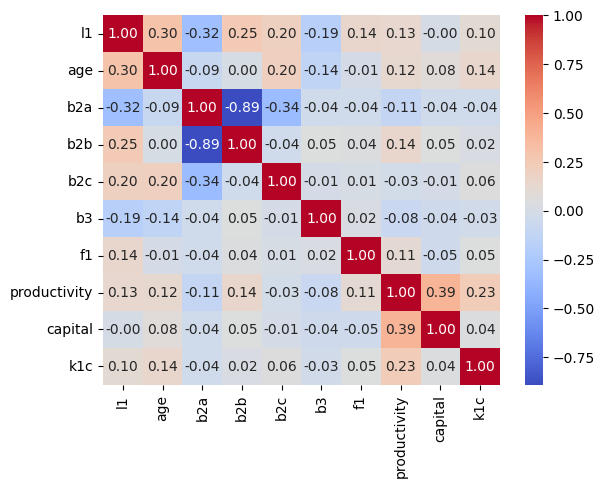

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

indies = merged[['l1', 'age', 'b2a', 'b2b', 'b2c', 'b3', 'f1', 'productivity', 'capital', 'k1c']]
# Assuming you have a DataFrame `df`
sns.heatmap(indies.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [29]:
!pip install linearmodels==4.24
import linearmodels


In [30]:
print(linearmodels.__version__)

4.24


In [50]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


merged['invested'] = (merged['n5a'] > 0).astype(int)

X_selection = merged[['capital']]  # Example: employee number, age, country.
X_selection = sm.add_constant(X_selection)  # Add constant term for intercept
y_selection = merged['invested']

merged_outcome = merged[merged['n5a'] > 0]
X_outcome = merged_outcome[['b2a', 'b3', 'f1', 'bmh1', 'k16', 'k7', 'capital','k5a','k5bc', 'k5i', 'k5e', 'k5f', 'bmk5a', 'bmk5b']]  # Predictors for the outcome equation
X_outcome = sm.add_constant(X_outcome)  # Add a constant
y_outcome = merged_outcome['investment']  # Dependent variable: amount invested

# Step 3: Initialize the Heckman Model
selection_model = sm.Probit(y_selection, X_selection).fit()

merged['IMR'] = selection_model.predict(X_selection)

outcome_model = sm.OLS(y_outcome, X_outcome.join(merged[['IMR']])).fit()

# Display the results
print(outcome_model.summary())

Optimization terminated successfully.
         Current function value: 0.678132
         Iterations 4
                            OLS Regression Results                            
Dep. Variable:             investment   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     46.45
Date:                Mon, 13 Jan 2025   Prob (F-statistic):          6.72e-116
Time:                        13:56:05   Log-Likelihood:                -3306.9
No. Observations:                1779   AIC:                             6646.
Df Residuals:                    1763   BIC:                             6734.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [ ]:
#k5a = % fixed assets last FY: internal funds
#k5bc = % fixed assets last FY: bank borrowing
#k5i = % fixed assets last FY: owners' contributions
#k5e = % fixed assets last FY: non-bank financial institutions
#k5f = % fixed assets last FY: credit from suppliers/ advances from customers
#bmk5a = % fixed assets last FY: gov. grants
#bmk5b
k5bc', 'k5i', 'k5e', 'k5f', 'bmk5a', 'bmk5b